# <span style="color:#0b4702;font-family:helvetica">Hierarchical Clustering

### <span style="color:#0b4702;font-family:helvetica"> Liek most clustering algorithms Hierarchical Clustering simply relies on measuring which data points are most "similar" to other data points.

### <span style="color:#0b4702;font-family:helvetica"> "Similarity" is defined by choosing a distance metric.

## <span style="color:#0b4702;font-family:helvetica"> Why to use Hirerachical Clustering ?
* Easy to understand and visualize.
* Helps users decide how many clusters to choose.
* Not necessary to choose cluster amount before running the algotrithm

## <span style="color:#0b4702;font-family:helvetica"> How it works ?

### <span style="color:#0b4702;font-family:helvetica"> It divides points into potential clusters:

### <span style="color:#0b4702;font-family:helvetica"> There are mainty two approaches to it

### <span style="color:#0b4702;font-family:helvetica"> Agglomerative Approach:
* Each point begins as its own cluster, then clusters are joined

### <span style="color:#0b4702;font-family:helvetica"> Divisive Approach:
* All points begin in the same cluster, then clusters are split.

## <span style="color:#0b4702;font-family:helvetica"> Agglomerative Clustering

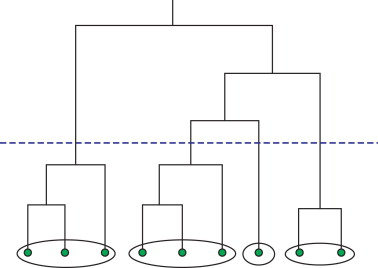

### With this approach we start with every single point as it own cluster of 1 and then we can find which point is similar to other point based on certain distance metric and make one cluster of that. we keep on repeating the process untill we get something like above hirerachy tree which is also know as Dendogram.

#### <span style="color:#0b4702;font-family:helvetica"> Opposite of Agglomerative approach is a Divisive approach, which starts with all points belonging to the same cluster, and the begins division to seperate out clusters. Essentially the reverse of the above diagram.

## <span style="color:#0b4702;font-family:helvetica"> Hierarchical Clustering Process:
* Compare data points to find most similar data points to each other.
* Merge these to create a cluster.
* Compare clusters to find most similar clusters and merge again.
* Repeat until all points in a single cluster.
* And we keep a track all all trees showing the potential clusters
    

### <span style="color:#0b4702;font-family:helvetica">  There are a few key topppic we still need to unserstand fro Hirerchical clustering:
* Similarity Metrix
* Dendogeam
* Linkage Matrix

### <span style="color:#0b4702;font-family:helvetica">  Similairty Metric distance between two points. There are many options to calcualte the distance:
* Euclidean Distance
* Manhatter
* Cosine 
* Hamming
* and many more.
    

### <span style="color:#0b4702;font-family:helvetica"> Default choise is Euclidean distance and what makes it so great?
   

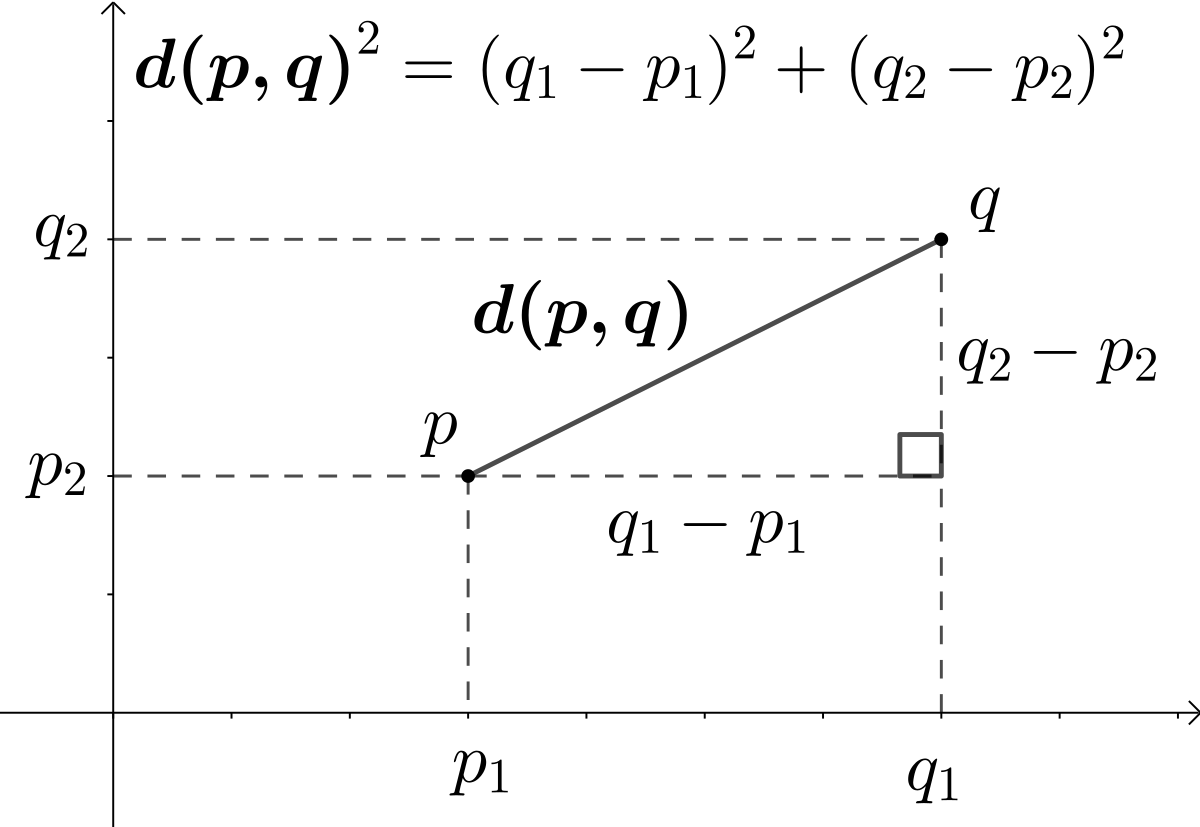

### <span style="color:#0b4702;font-family:helvetica"> Euclidean distance metric is based on pythagoras theorem where
* $\large{a}^{2} { + } {b}^{2} { = } {c}^{2}$

### <span style="color:#0b4702;font-family:helvetica"> Like we are saying the distance between point p and point q is:</span>
## $\large{d}{(}{p}{, }{q}{)}^{2}{ = }{(}{q}_{1}{ + }{p}_{1}{)}^{2}{ + } {(}{q}_{2}{ + }{p}_{2}{)}^{2}$

### <span style="color:#0b4702;font-family:helvetica"> In this Each dimention would be a feature corresponding to our dataset 

#### <span style="color:#0b4702;font-family:helvetica"> Which means for n data points and p features:
* $\large{D}^{2} = {(}{x}_{11} { - }{x}_{12}{)}^{2}{ + ....... + }{(}{x}_{n-1p-1}{ - } {x}{np}{)}^{2}$

### <span style="color:#0b4702;font-family:helvetica"> Using MinMaxScaler we can scale all features to be between 0 and 1.</span>
### <span style="color:#0b4702;font-family:helvetica"> And this will allow for maximum distance between feature to be 1.

## <span style="color:#0b4702;font-family:helvetica"> Dendogram:
* Plot displaying all potential clusters.
* Very computationally expensive to compute and display fro larger data sets.
* Very usefull for decising on number of Clsuters.

### <span style="color:#0b4702;font-family:helvetica"> On Y axis of Dendodgram has different lenghts what we call as link points and Y axis here is the representation of distance between the clusters or distance between the poitns.

### <span style="color:#0b4702;font-family:helvetica"> Also another nice thing about the dendogram which is key to hirerachial clustering is that we can technically to " Slice" our cluster count

## <span style="color:#0b4702;font-family:helvetica"> Linkage:
* How do we measure distacne from a point to an entire cluster ?
* How do we measure distance from a cluster to another cluster ?

### <span style="color:#0b4702;font-family:helvetica"> Once two or more points are together and we want to continue agglomerative clustering to join clusters, we ned to decide on a Linkage parameter

### <span style="color:#0b4702;font-family:helvetica"> Linkage is formally speaking:
* Criterion determining which distance to use between sets of obeservstions
* Algorithm will merge pairs of clusters that minimizes the criterion.

### <span style="color:#0b4702;font-family:helvetica"> There are different linkage parameter:
* WARD : minimizes variance of cluster being merged.
* AVERAGE: uses average distance between two sets.
* Minimim or Maximum distances between all overservatios of the two sets.

# <span style="color:#0b4702;font-family:helvetica"> Hierarchial Clustering Coding: Data and Visualization

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("cluster_mpg.csv")

In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [15]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
df["origin"].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [17]:
df_with_dummies = pd.get_dummies(df.drop("name",axis = 1))

In [19]:
df_with_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


## <span style="color:#0b4702;font-family:helvetica"> For hirerachical clustering it is recomended to sued MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
scaled_data = scaler.fit_transform(df_with_dummies)

In [23]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

#### <span style="color:#0b4702;font-family:helvetica"> We can see the values are between 0 and 1

### <span style="color:#0b4702;font-family:helvetica"> We can make a data fram from numpy array

In [24]:
scaled_df= pd.DataFrame(scaled_data,columns=df_with_dummies.columns)

In [25]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<AxesSubplot:>

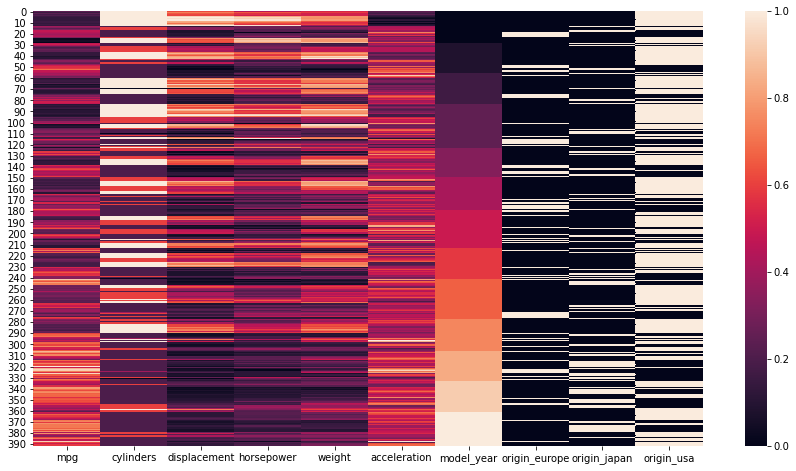

In [26]:
plt.figure(figsize = (15,8))
sns.heatmap(scaled_df)

<Figure size 1080x576 with 0 Axes>

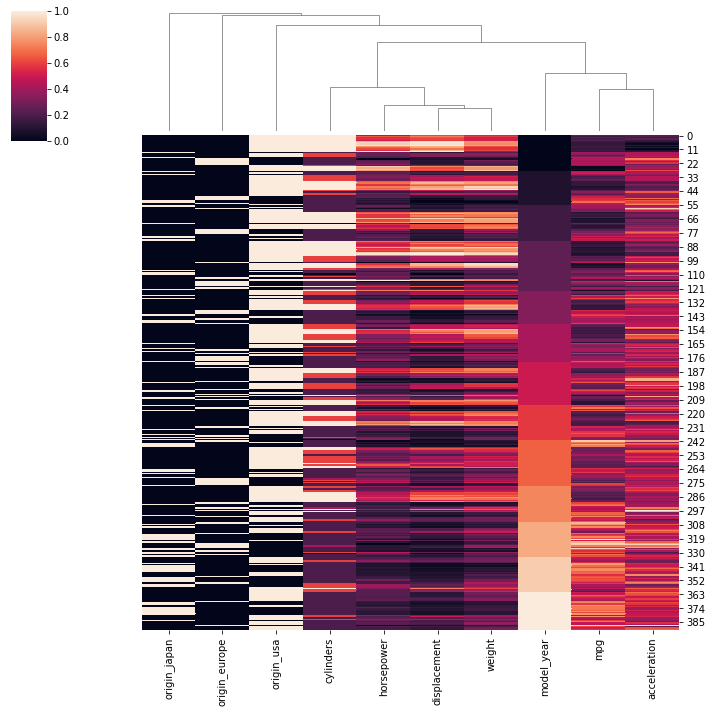

In [28]:
plt.figure(figsize = (15,8))
sns.clustermap(scaled_df, row_cluster= False)

<AxesSubplot:>

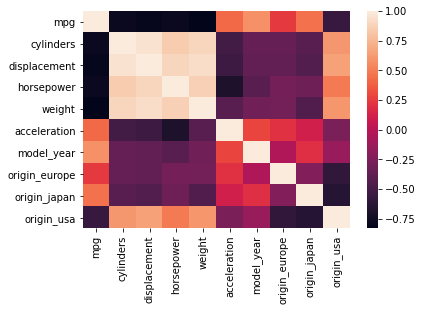

In [30]:
sns.heatmap(scaled_df.corr())

### But we want to really want to look at row clusters

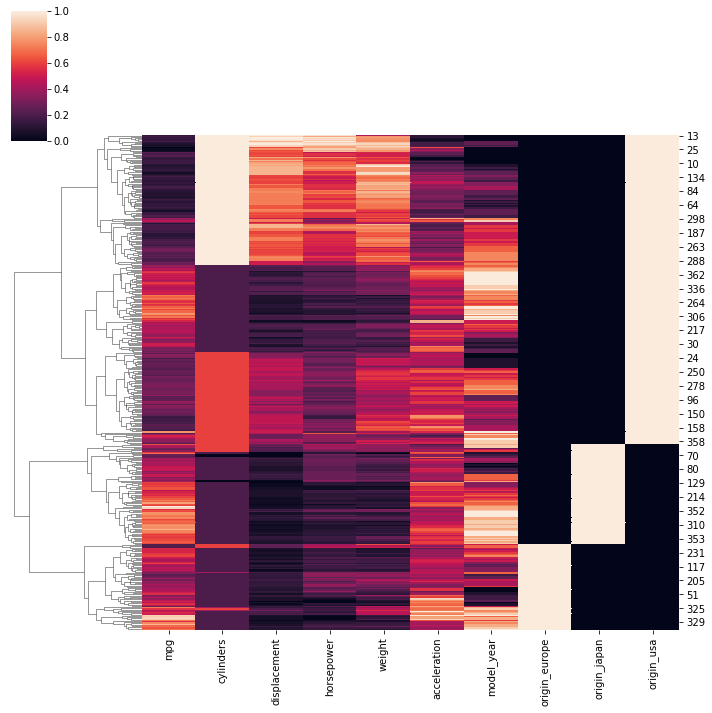

In [31]:
sns.clustermap(scaled_df, col_cluster=False)

### <span style="color:#0b4702;font-family:helvetica"> Limitation with seaborn clustering is it cannot do it for large data and wither it will not be able to retrun back the results of labeling

# <span style="color:#0b4702;font-family:helvetica"> Hirerachical Clustering Coding - Clusters and Dendogram With Scikit-Learn

#### <span style="color:#0b4702;font-family:helvetica"> Sklearn doesn't have specifically Hirerachical Clustering, but rather it is Agglomerative Clustering 

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
model = AgglomerativeClustering(n_clusters= 4)## these 4 clusters are based on seaborn clustermap for small data

In [34]:
cluster_labels = model.fit_predict(scaled_df)

In [35]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

#### <span style="color:#0b4702;font-family:helvetica"> So we have 4 different clusters 0, 1, 2, 3

### <span style="color:#0b4702;font-family:helvetica"> We can use this by visualizing against features or multiple fearures based of the cluster labels.

<AxesSubplot:xlabel='mpg', ylabel='weight'>

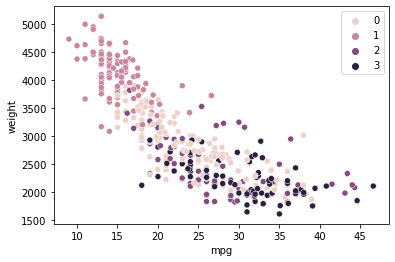

In [37]:
sns.scatterplot(data = df,x="mpg",y = 'weight', hue = cluster_labels)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

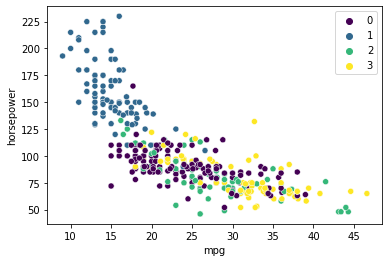

In [39]:
sns.scatterplot(data = df,x="mpg",y = 'horsepower', hue = cluster_labels, palette="viridis")

### <span style="color:#0b4702;font-family:helvetica">This is so far we have the intuition about the number of clusters due to visualization we did, now we can take advantage of Dendogram to workwith.</span>

### <span style="color:#0b4702;font-family:helvetica"> Here we will not have the option at starting to choose the number of cluster and for that if we look at scikit-learn documnetation we have a hyperparmeter as 'affinity' which esstially ask for which distance metric you want to use. Default is Euclidean

### <span style="color:#0b4702;font-family:helvetica"> Recommended to use Eculidean Distance as it is easy interpret with MinMaxScaler

### Max distance possible is sqrt(n_features)

In [41]:
len(scaled_df.columns)

10

#### It means if we have 10 columns then np.sqrt(10) = 3.1622 is the maximum distance possible between two points in our min max scaled feature space

In [43]:
np.sqrt(10)

3.1622776601683795

### <span style="color:#0b4702;font-family:helvetica"> How can we use this information?
    

### <span style="color:#0b4702;font-family:helvetica"> if we again look at hyperparmeters there is distance_threshold which is by default is none.But, when we define that the N_clusters should be none

In [44]:
model = AgglomerativeClustering(n_clusters= None)

### <span style="color:#0b4702;font-family:helvetica"> If we keep distance_threshold to be 0 it means nothing going to be merged.

In [45]:
model = AgglomerativeClustering(n_clusters= None, distance_threshold=0)

In [46]:
cluster_labels = model.fit_predict(scaled_df)

In [47]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

### <span style="color:#0b4702;font-family:helvetica"> So when we made thresehold to be 0 a cluster has been created for every data point

In [48]:
from scipy.cluster.hierarchy import dendrogram # this is a visualization function 

### <span style="color:#0b4702;font-family:helvetica">With scipy we can create dendogram if we give a linkage matrix

In [49]:
from scipy.cluster import hierarchy

In [50]:
linkage_matrix = hierarchy.linkage(model.children_)

In [51]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

### We have a linkage matrix and it explains as at index 0 i.e. column1 . at first row if we lookt at column1 has data point 67 column 2 has 161. and third column shows distance between them and actual number of points in this in this cluster i.e. 2

### We can plot dendogram with above linkage matrix

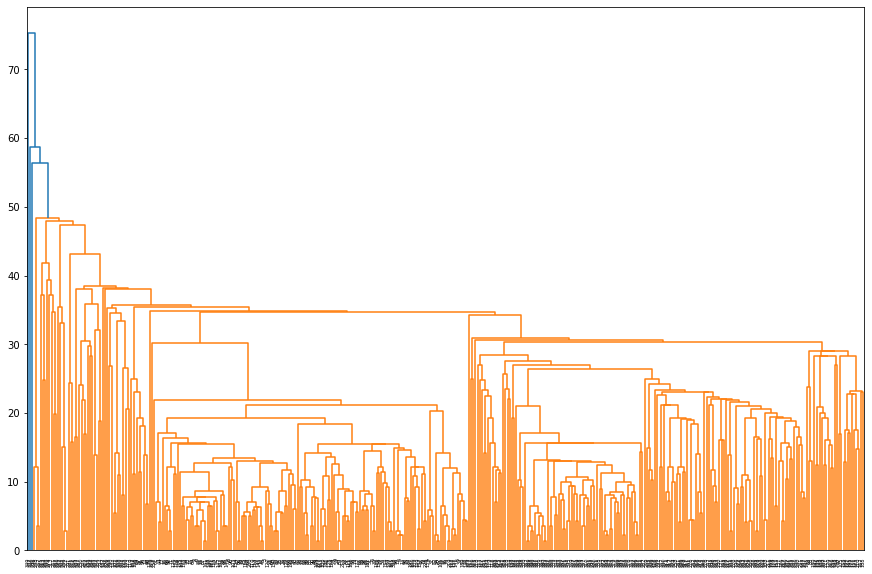

In [52]:
plt.figure(figsize=(15,10))
dendro = dendrogram(linkage_matrix)

### This is linkage matrix as dendogram

### This so far not so usefull but we can make some judgement call on where we should cut off this hierarchy

### For cut off we can make use of scipy dengogram library by adding truncate mode parameter

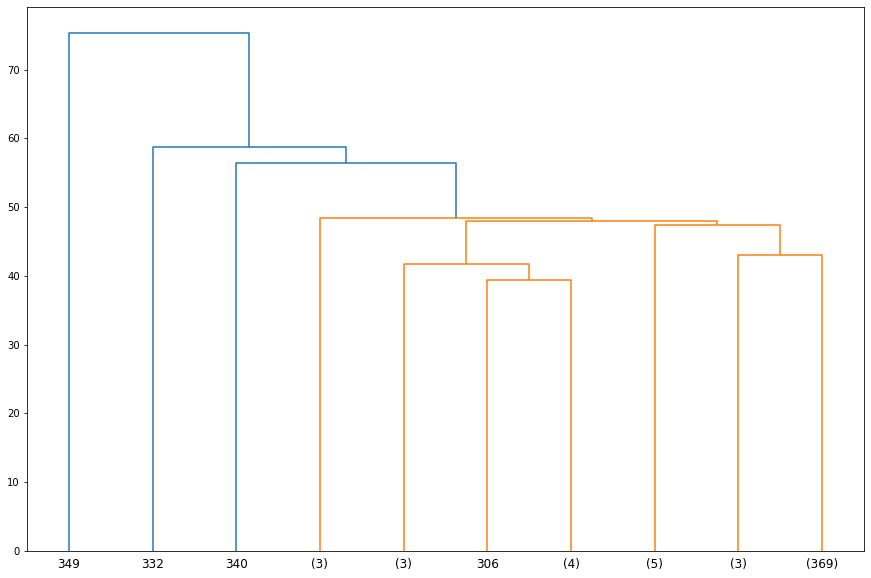

In [53]:
plt.figure(figsize=(15,10))
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p = 10)

### <span style="color:#0b4702;font-family:helvetica"> After adding truncate parameterwe can see 10 cluster.As we bing to truncate we are not able to interpret the X- xsis nicely any more , because it is just giving cluster numbers.Its really done decide upon how many cluster to start with

#### Another truncate mode is level

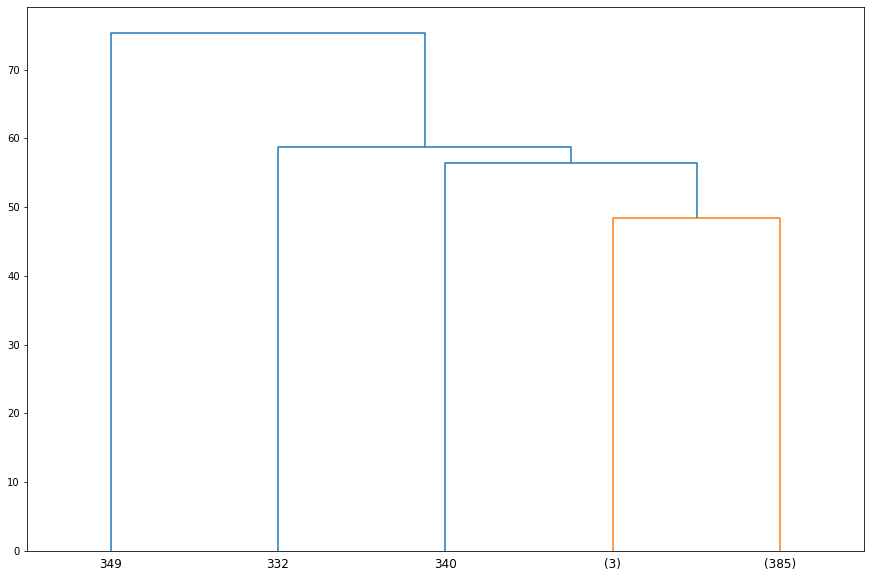

In [54]:
plt.figure(figsize=(15,10))
dendro = dendrogram(linkage_matrix, truncate_mode='level', p = 3)

### This will help more direclty to choose number of clusters

## <span style="color:#0b4702;font-family:helvetica">But with very large dataset it is still not goof to visualize , lets we can choose threshold distance by truly understanding the euclidean distance

In [55]:
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### <span style="color:#0b4702;font-family:helvetica"> We can see our min value is 0 and max value is 1 that means the max possible distance  is 

In [56]:
np.sqrt(len(scaled_df.columns))

3.1622776601683795

### <span style="color:#0b4702;font-family:helvetica">This is our throeitical max distance

### <span style="color:#0b4702;font-family:helvetica"> Realistic max distance

In [58]:
scaled_df["mpg"].idxmax()

320

In [59]:
scaled_df["mpg"].idxmin()

28

In [60]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [63]:
euclidean_distance = np.linalg.norm(car_a-car_b) ### this is use of linear algebra from numpy

In [62]:
euclidean_distance

2.3852929970374714

### <span style="color:#0b4702;font-family:helvetica">  So the theoritical Max distance is 3.16 , but the realistic ditance between the car with max miles per gallaon and car with min miles per gallon is 2.385

#### One thing to keep in mind that this is distance between the points not between clusters

### So by looking a the max distance and euclidean distance we can make out either 2 or 3 will be good point to start with distance thereshold

In [64]:
model = AgglomerativeClustering(n_clusters= None, distance_threshold=2)

In [65]:
cluster_labels = model.fit_predict(scaled_df)

In [66]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

### so it has made 11 clusters

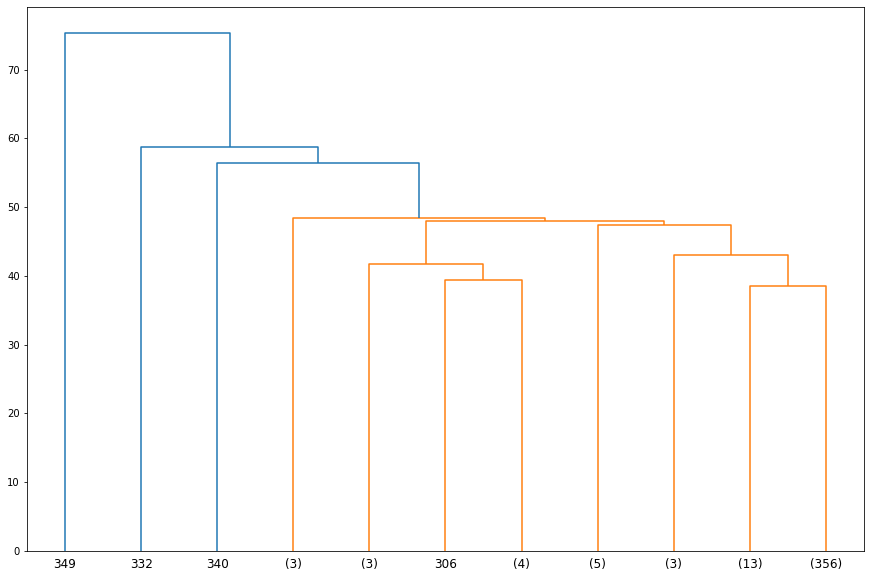

In [67]:
plt.figure(figsize=(15,10))
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p = 11)

# Thank you!